# Code for Bachelor Thesis in Economics at Heidelberg University
## by Daniel Schäffer

## Imports:

In [1]:

from functions import plot_merra_data, plot_grid, plot_barchart3d, one_dim_lat_lon_array, plot_merra_data2, plot_simulation_comparison,create_population_weight_array
# from functions import plot_main_dust
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



In [2]:
mpl.font_manager._rebuild()
# Use Open Sans font family for all text.
plt.rc('font', family='Open Sans')
plt.rcParams['figure.dpi'] = 150

In [3]:
parent_directory = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath("__file__")), os.pardir))

# 3. Empirical Strategy

## 3.1 Physical Model

### Data

In [4]:
dust_hourly_data = np.load(parent_directory + '\\processed_data\\dust_hourly_data.npy')
simulated_dustmass_hourly_data = np.load(parent_directory + '\\processed_data\\simulated_dustmass_hourly_data.npy')
simulated_dustmass_hourly_novapr_data = np.load(parent_directory + '\\processed_data\\simulated_dustmass_hourly_novapr_data.npy')
simulated_dustmass_hourly_junsep_data = np.load(parent_directory + '\\processed_data\\simulated_dustmass_hourly_junsep_data.npy')
dust_t0_array = np.load(parent_directory + '\\processed_data\\dust_t0_array.npy')

In [5]:
west_africa_longitudes = np.load(parent_directory + '\\processed_data\\west_africa_longitudes.npy')
west_africa_latitudes = np.load(parent_directory + '\\processed_data\\west_africa_latitudes.npy')
west_africa_lat1d, west_africa_lon1d = one_dim_lat_lon_array(west_africa_latitudes, west_africa_longitudes, 1)

In [6]:
def plot_grid(lats, lons, title='', extent=[-150, 150, -90, 90], borders = False, add_source_region = False,
              plot_lines = True, plot_grid_lines = True, add_countries = False, country_list = '', color_list = '', country_alpha = 1, country_names = ''):

    fig = plt.figure(figsize=(16,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    if add_source_region:
        # #34
        # #∼ 21°N, 16°W
        # add_pixel(ax,21,22,-16,-17)
        # #∼26°–27°N, 6° –7°W
        # add_pixel(ax,26,27,-6,-7)
        # #35
        # #∼17°– 18°N, 8°–10°W
        # add_pixel(ax,17,18,-8,-10)
        # #∼ 16°N, 3°–4°W
        # add_pixel(ax,16,17,-3,-4)
        # #18° and 20°N and 3° and 8°W
        # add_pixel(ax,18,20,-3,-8)
        # #36
        # #26°N, 1°E
        # add_pixel(ax,26,27,1,2)
        # #37
        # #lies between 18° and 23°N, 3° and 6°E
        # add_pixel(ax,18,23,3,6)
        # #39
        # #lies between 16° and 18°N and extends from 15° to 19°E
        # add_pixel(ax,16,18,15,19)
        # #centered at ∼17.5°N between 12° and 14°E
        # add_pixel(ax,17.5, 18.5, 12,14)
        # #ax.add_patch(Rectangle((15.5,16.05), (18.05-15.5), (17.38-16.05),color = 'black',fill=True))


        #merra spatial resolution: 0.5 ° x 0.5 °
        
        #upper left:
        for pixel in return_region_pixel_array(region_name = 'upper_left'):
            # print('pixel1: ' , pixel[1] , 'actual lon: ' , lons[pixel[1]])
            add_pixel2(ax,lons[pixel[1]], lats[pixel[0]], alpha=1,fill=True)
        #bodele:
        for pixel in return_region_pixel_array(region_name = 'bodele'):
            add_pixel2(ax,lons[pixel[1]], lats[pixel[0]], alpha=1)
        #upper right:
        for pixel in return_region_pixel_array(region_name = 'upper_right'):
            add_pixel2(ax,lons[pixel[1]], lats[pixel[0]], alpha=1)
        #upper right corner:
        for pixel in return_region_pixel_array(region_name = 'upper_right_corner'):
            add_pixel2(ax,lons[pixel[1]], lats[pixel[0]], alpha=1)

    if add_countries:
        for idx,country in enumerate(country_list):
            #draw them afterwards
            if (country == 'benin' or country == 'gambia'):
                continue
            else:
                for pixel in return_region_pixel_array(region_name = country):
                    add_pixel2(ax,lons[pixel[1]], lats[pixel[0]], alpha=country_alpha, color=color_list[idx])
        for pixel in return_region_pixel_array(region_name = 'benin'):
            add_pixel2(ax,lons[pixel[1]], lats[pixel[0]], alpha=country_alpha, color='black')
        for pixel in return_region_pixel_array(region_name = 'gambia'):
            add_pixel2(ax,lons[pixel[1]], lats[pixel[0]], alpha=country_alpha, color='deepskyblue')

    if plot_lines:

        for lat in lats:
            ax.hlines(y=lat+.25, xmin = -30, xmax = 35, linewidth=.5, color='r')
        
        for lon in lons:
            ax.vlines(x=lon+.25, ymin =-15, ymax = 30, linewidth=.5, color='r')
    
    #additional geographical information
    ax.coastlines(resolution="50m",linewidth=1)
    if(borders):
        ax.add_feature(cf.BORDERS)
    #gridlines

    if plot_grid_lines:
        gl = ax.gridlines(linestyle='--',color='black', draw_labels=True)
    else:
        gl = ax.gridlines(linestyle='--',color='black', draw_labels=True, alpha=0)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}
    #axis labeling
    ax.text(-0.08, 0.55, 'Latitude', va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', transform=ax.transAxes, size=22)
    ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center', rotation='horizontal', rotation_mode='anchor', transform=ax.transAxes, size=22)

    if add_countries:

        handles = [
            Patch(facecolor=color, label=label) 
            for label, color in zip(country_names, color_list)
        ]

        ax.legend(handles=handles)

    #plot+info
    #plt.contourf(lons, lats, data, transform=ccrs.PlateCarree(),cmap='YlOrRd')
    plt.title(f'{title}', size=22, pad=15, weight='bold')
    plt.xlabel('Latitude')
    plt.show()

### Plots

NameError: name 'return_region_pixel_array' is not defined

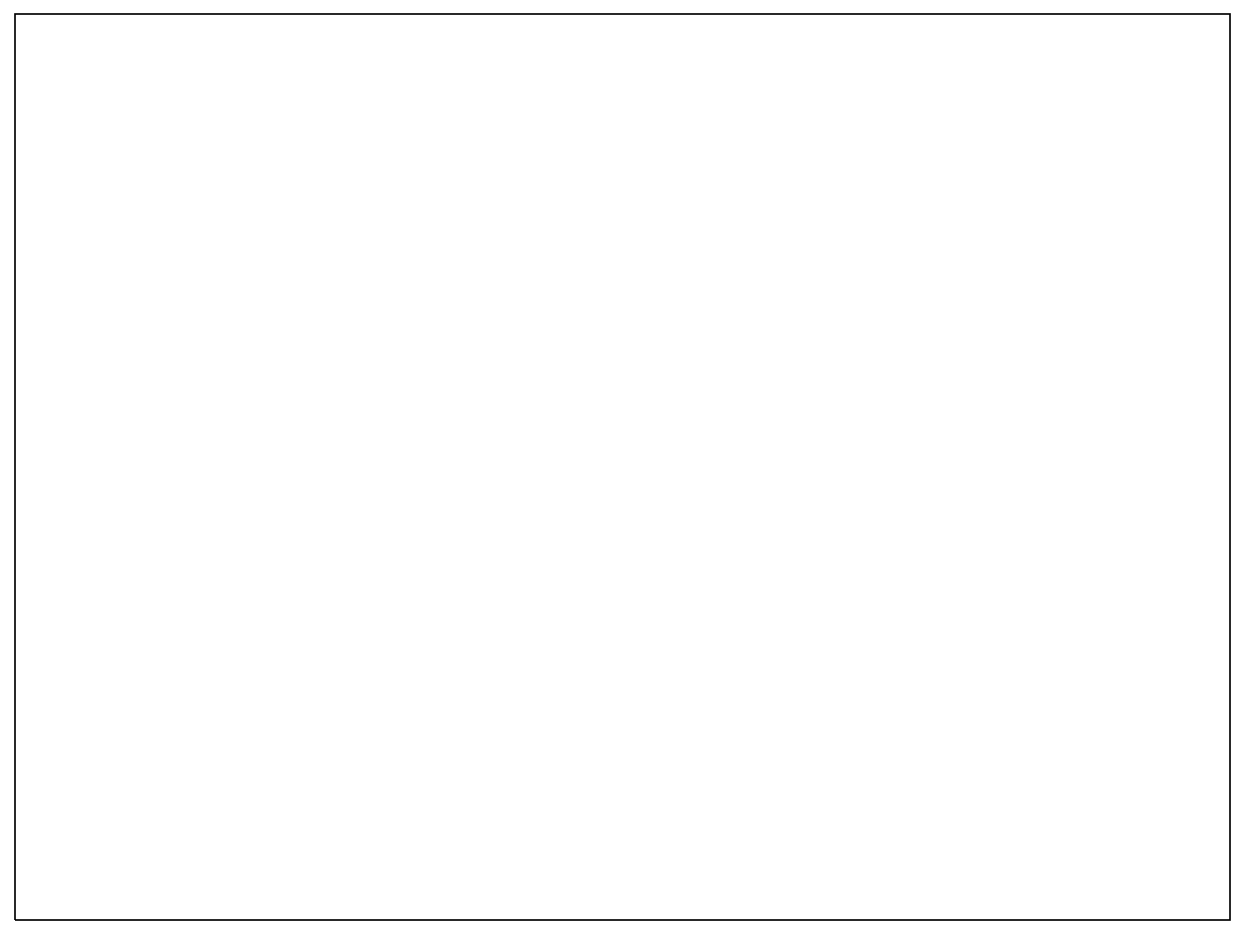

In [7]:
plot_grid(west_africa_latitudes, west_africa_longitudes,
          'MERRA-2 sized 0.5° x 0.625° grid with source regions',
          extent=[-30,29,-15,29], borders = True,
          add_source_region = True)

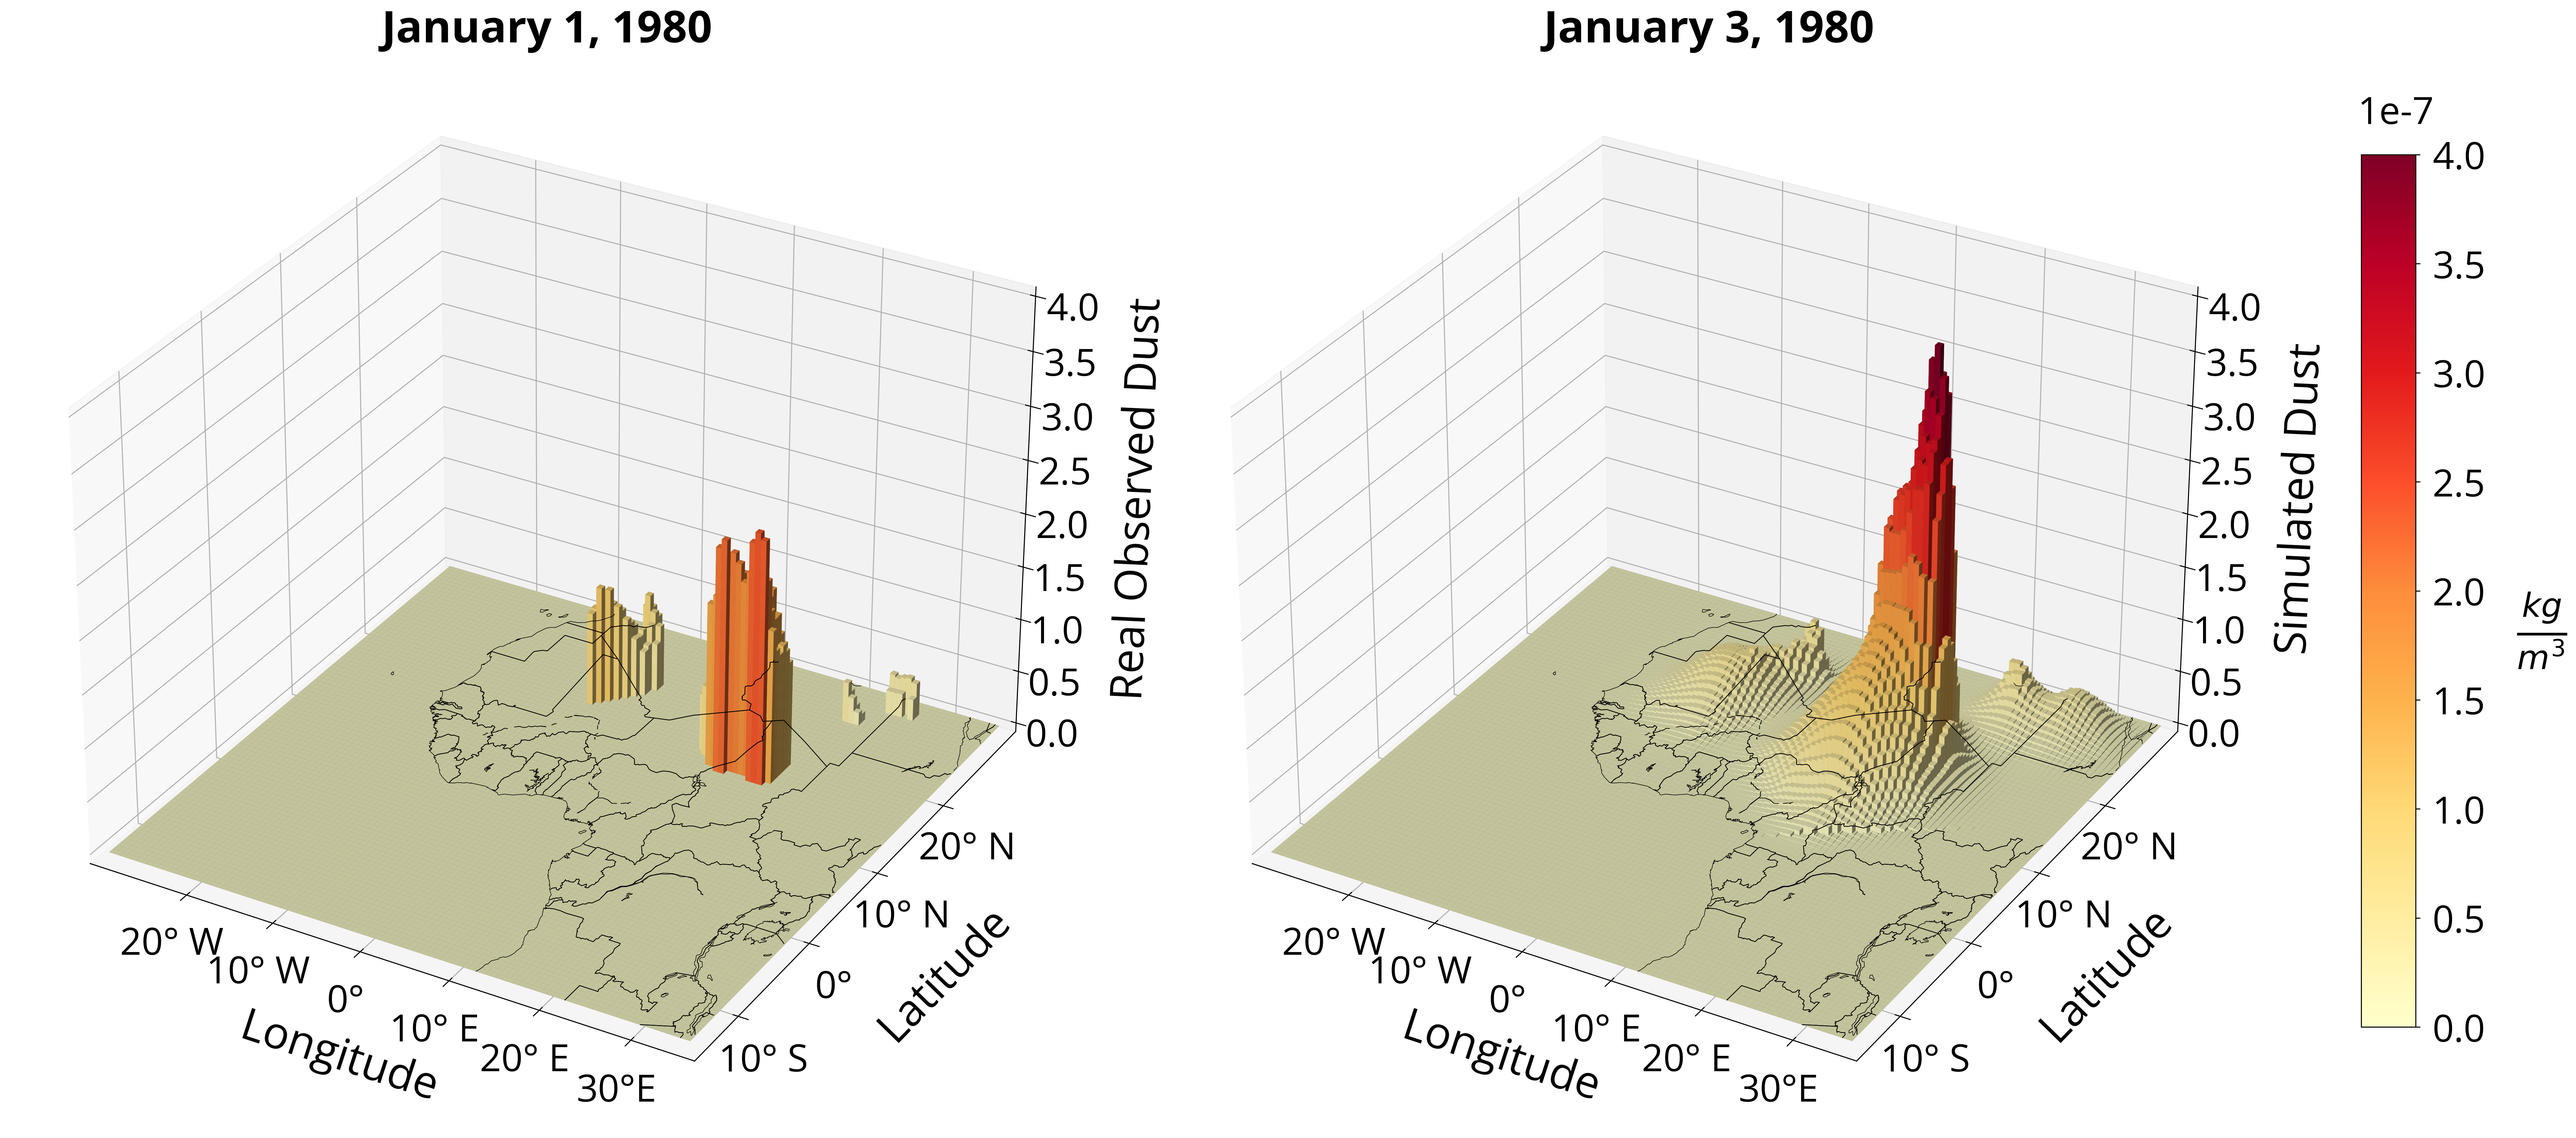

In [ ]:
plot_barchart3d(dust_t0_array*10**7,simulated_dustmass_hourly_data[47]*10**7,lons_onedim = west_africa_lon1d, lats_onedim = west_africa_lat1d, title_1 = 'January 1, 1980', title_2 = 'January 3, 1980', Opacity = 1, title_size=35, value_size=30, xpad = 10, ypad= 10, zpad=10)

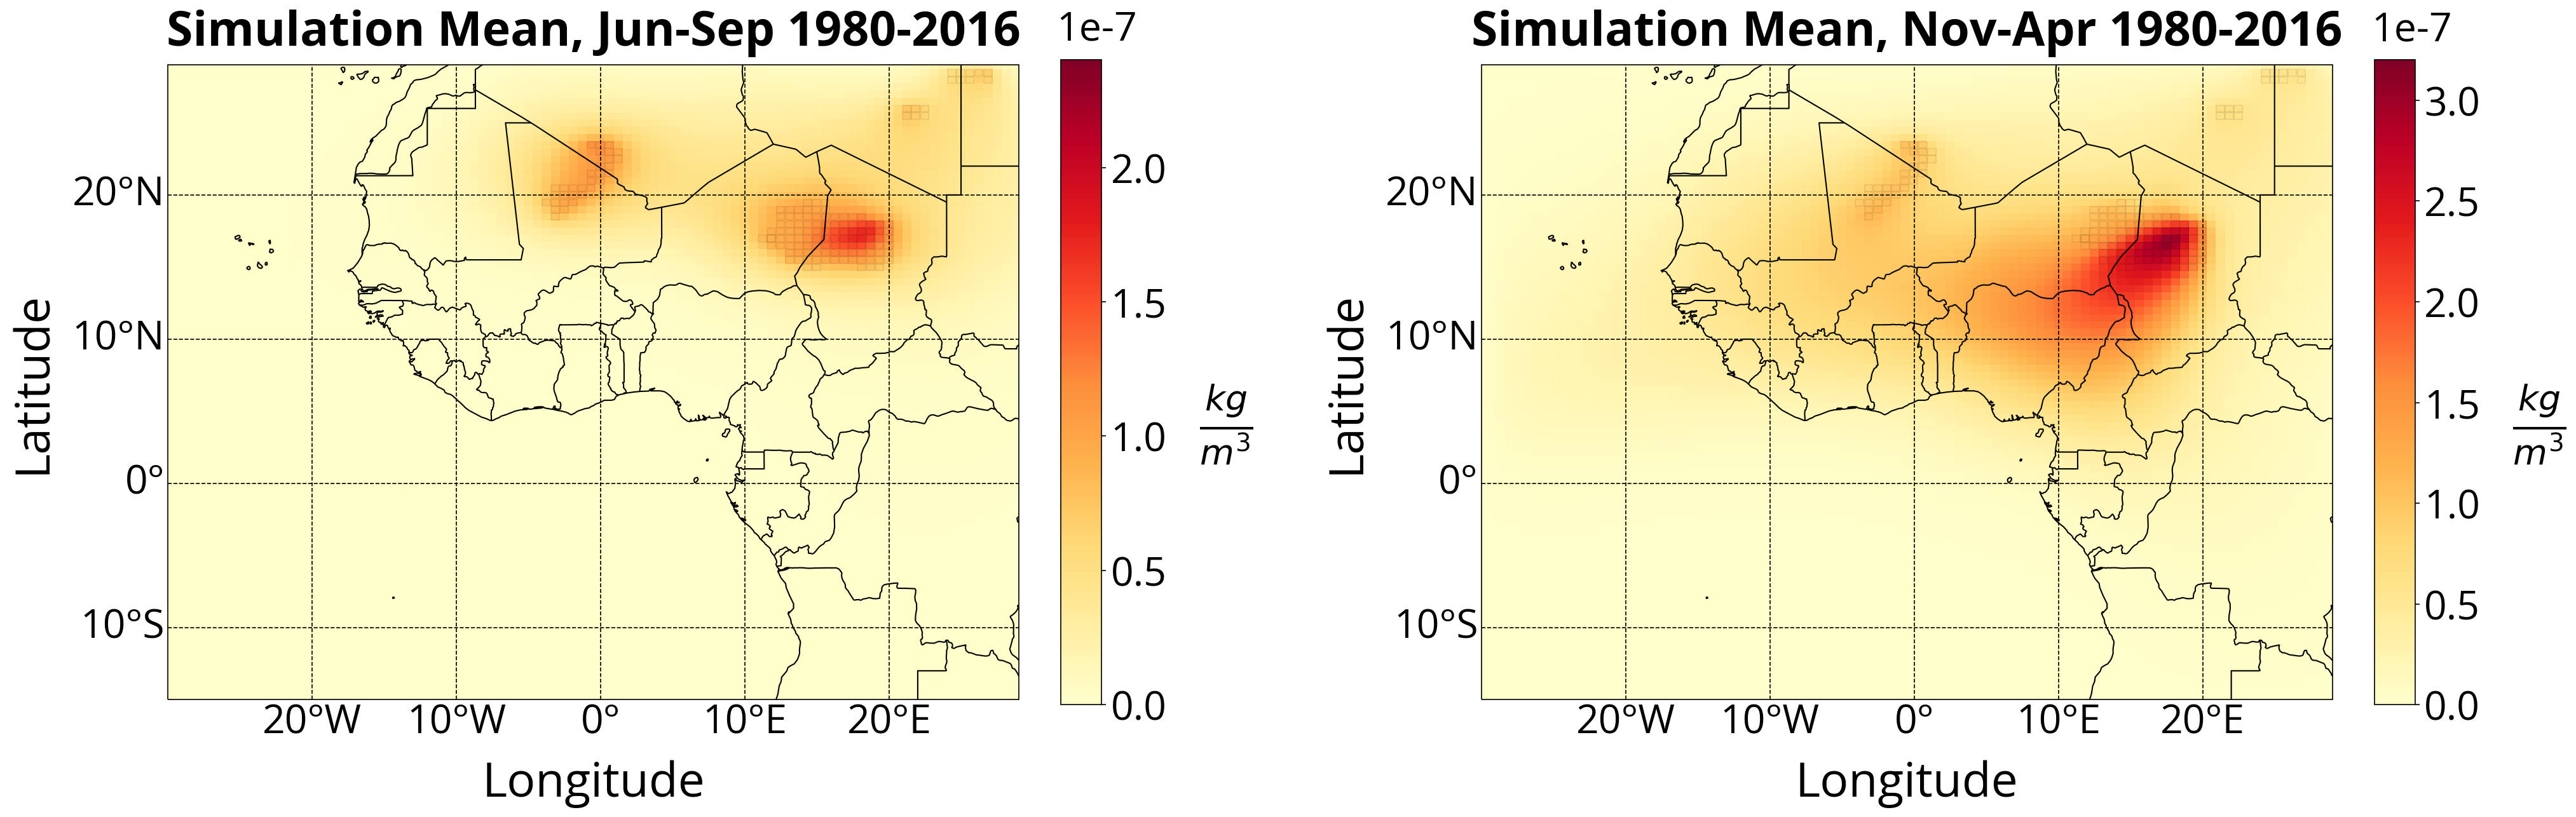

In [ ]:
plot_merra_data2([(np.sum(simulated_dustmass_hourly_junsep_data, axis = 0)/simulated_dustmass_hourly_junsep_data.shape[0])*10 ** 7, 
                (np.sum(simulated_dustmass_hourly_novapr_data, axis = 0)/simulated_dustmass_hourly_novapr_data.shape[0])*10 ** 7],
                west_africa_longitudes, west_africa_latitudes,
                titles=['Simulation Mean, ',
                        'Simulation Mean, '],
                date=['Jun-Sep 1980-2016', 'Nov-Apr 1980-2016'], data_values=[r'$\frac{kg}{m^3}$',r'$\frac{kg}{m^3}$'] , extent=[-30,29,-15,29],
                borders = True, bodele = False, plot_grids = True, add_source_region = True,
                add_bodele_source_exclusive = False, source_region_alpha = 1, source_region_color='black', source_region_lw=.06,
                cbar_color = ['YlOrRd','YlOrRd'], cbar_min = [0,0], cbar_max = [2.4,3.2],
                unit = [1,1], figsize = (32,16), rows = 1, columns = 2, shrink=0.56, labelsize = 14,
                text_size = 36, value_size=30, scientific_y =[2.44,3.25], w_space=.25, lon_space=[-0.17,-.17], lat_space=[-.13, -.13])

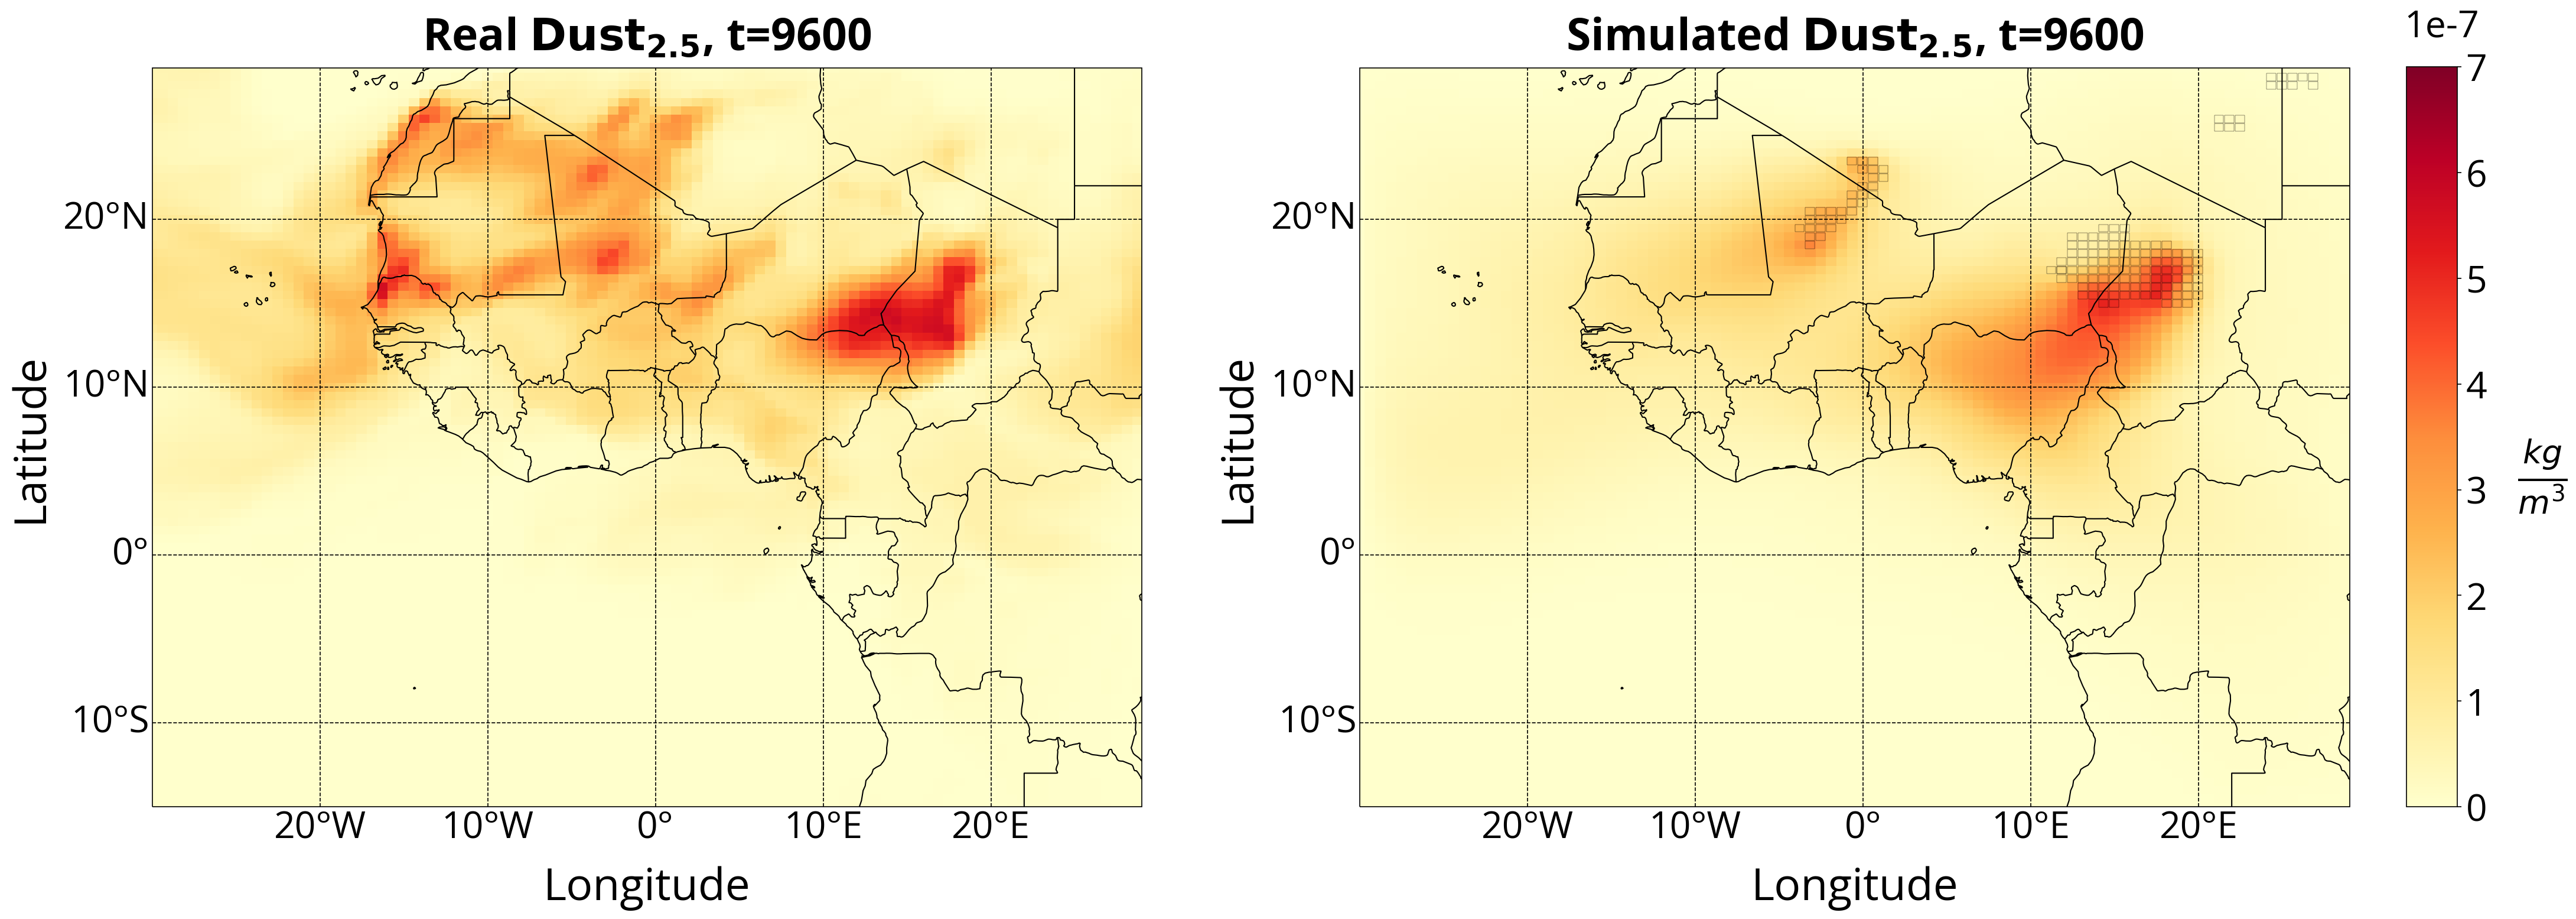

In [ ]:
plot_simulation_comparison([dust_hourly_data[9600]*10**7,simulated_dustmass_hourly_data[9600]* 10**7],
                west_africa_longitudes, west_africa_latitudes,
                titles=['Real $\mathbf{Dust_{2.5}}$, ', 'Simulated $\mathbf{Dust_{2.5}}$, '],
                date=['t=9600', 't=9600'], data_values=[r'$\frac{kg}{m^3}$',r'$\frac{kg}{m^3}$'] ,
                extent=[-30,29,-15,29],
                borders = True, bodele = False, plot_grids = True, add_source_region = True,
                add_bodele_source_exclusive = False, source_region_alpha = 1, source_region_color='black', source_region_lw=.2,
                cbar_color = ['YlOrRd','YlOrRd'], cbar_min = [0,0], cbar_max = [7,7],
                unit = [1,1], figsize = (32,16), rows = 1, columns = 2, shrink=0.56, labelsize = 14,
                text_size = 36, value_size=30, scientific_y =[2.45,7.2], lat_space = [-.1,-.1], lon_space=[-.14,-.14])

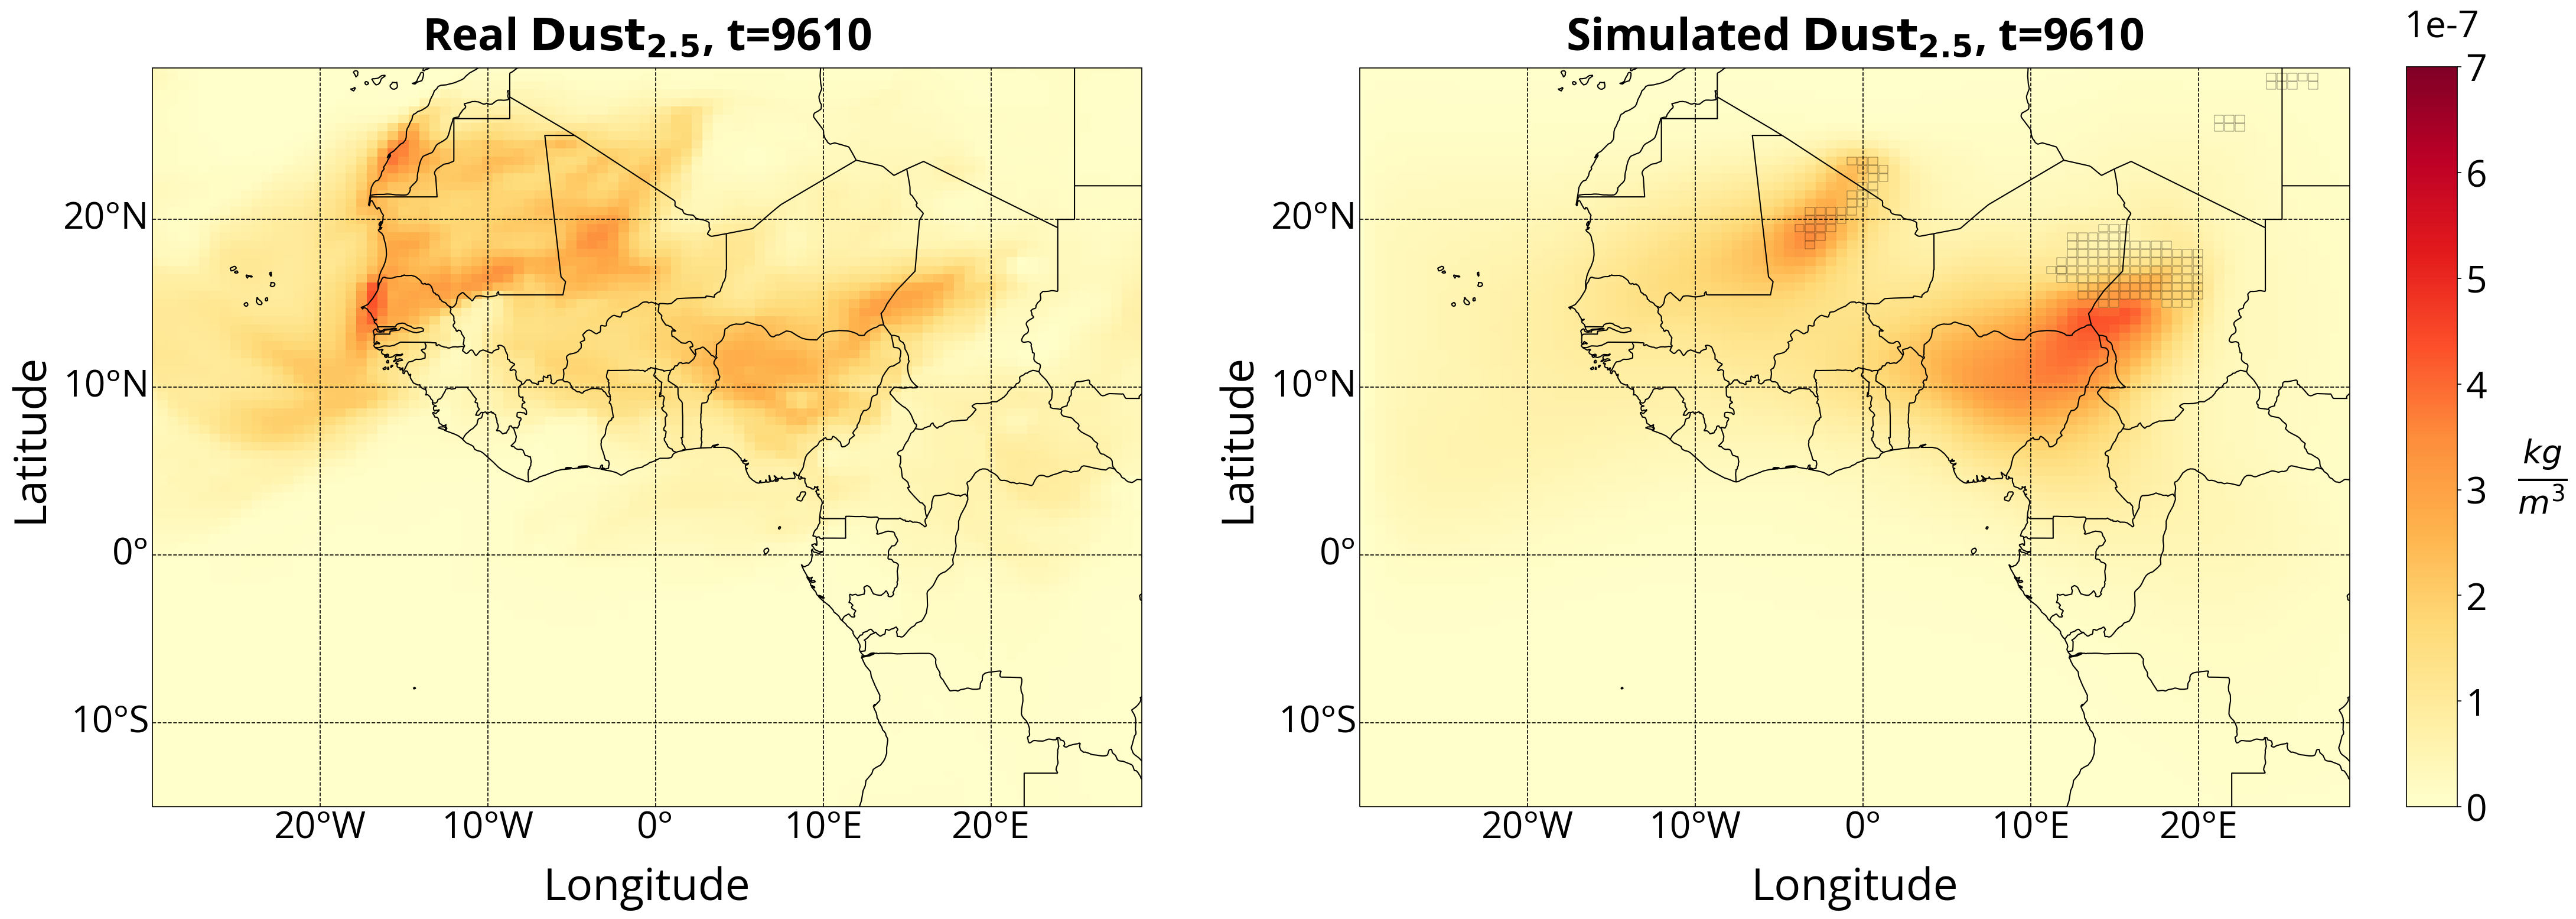

In [ ]:
plot_simulation_comparison([dust_hourly_data[9610]*10**7,simulated_dustmass_hourly_data[9610]* 10**7],
                west_africa_longitudes, west_africa_latitudes,
                titles=['Real $\mathbf{Dust_{2.5}}$, ', 'Simulated $\mathbf{Dust_{2.5}}$, '],
                date=['t=9610', 't=9610'], data_values=[r'$\frac{kg}{m^3}$',r'$\frac{kg}{m^3}$'] ,
                extent=[-30,29,-15,29],
                borders = True, bodele = False, plot_grids = True, add_source_region = True,
                add_bodele_source_exclusive = False, source_region_alpha = 1, source_region_color='black', source_region_lw=.2,
                cbar_color = ['YlOrRd','YlOrRd'], cbar_min = [0,0], cbar_max = [7,7],
                unit = [1,1], figsize = (32,16), rows = 1, columns = 2, shrink=0.56, labelsize = 14,
                text_size = 36, value_size=30, scientific_y =[2.45,7.2], lat_space = [-.1,-.1], lon_space=[-.14,-.14])

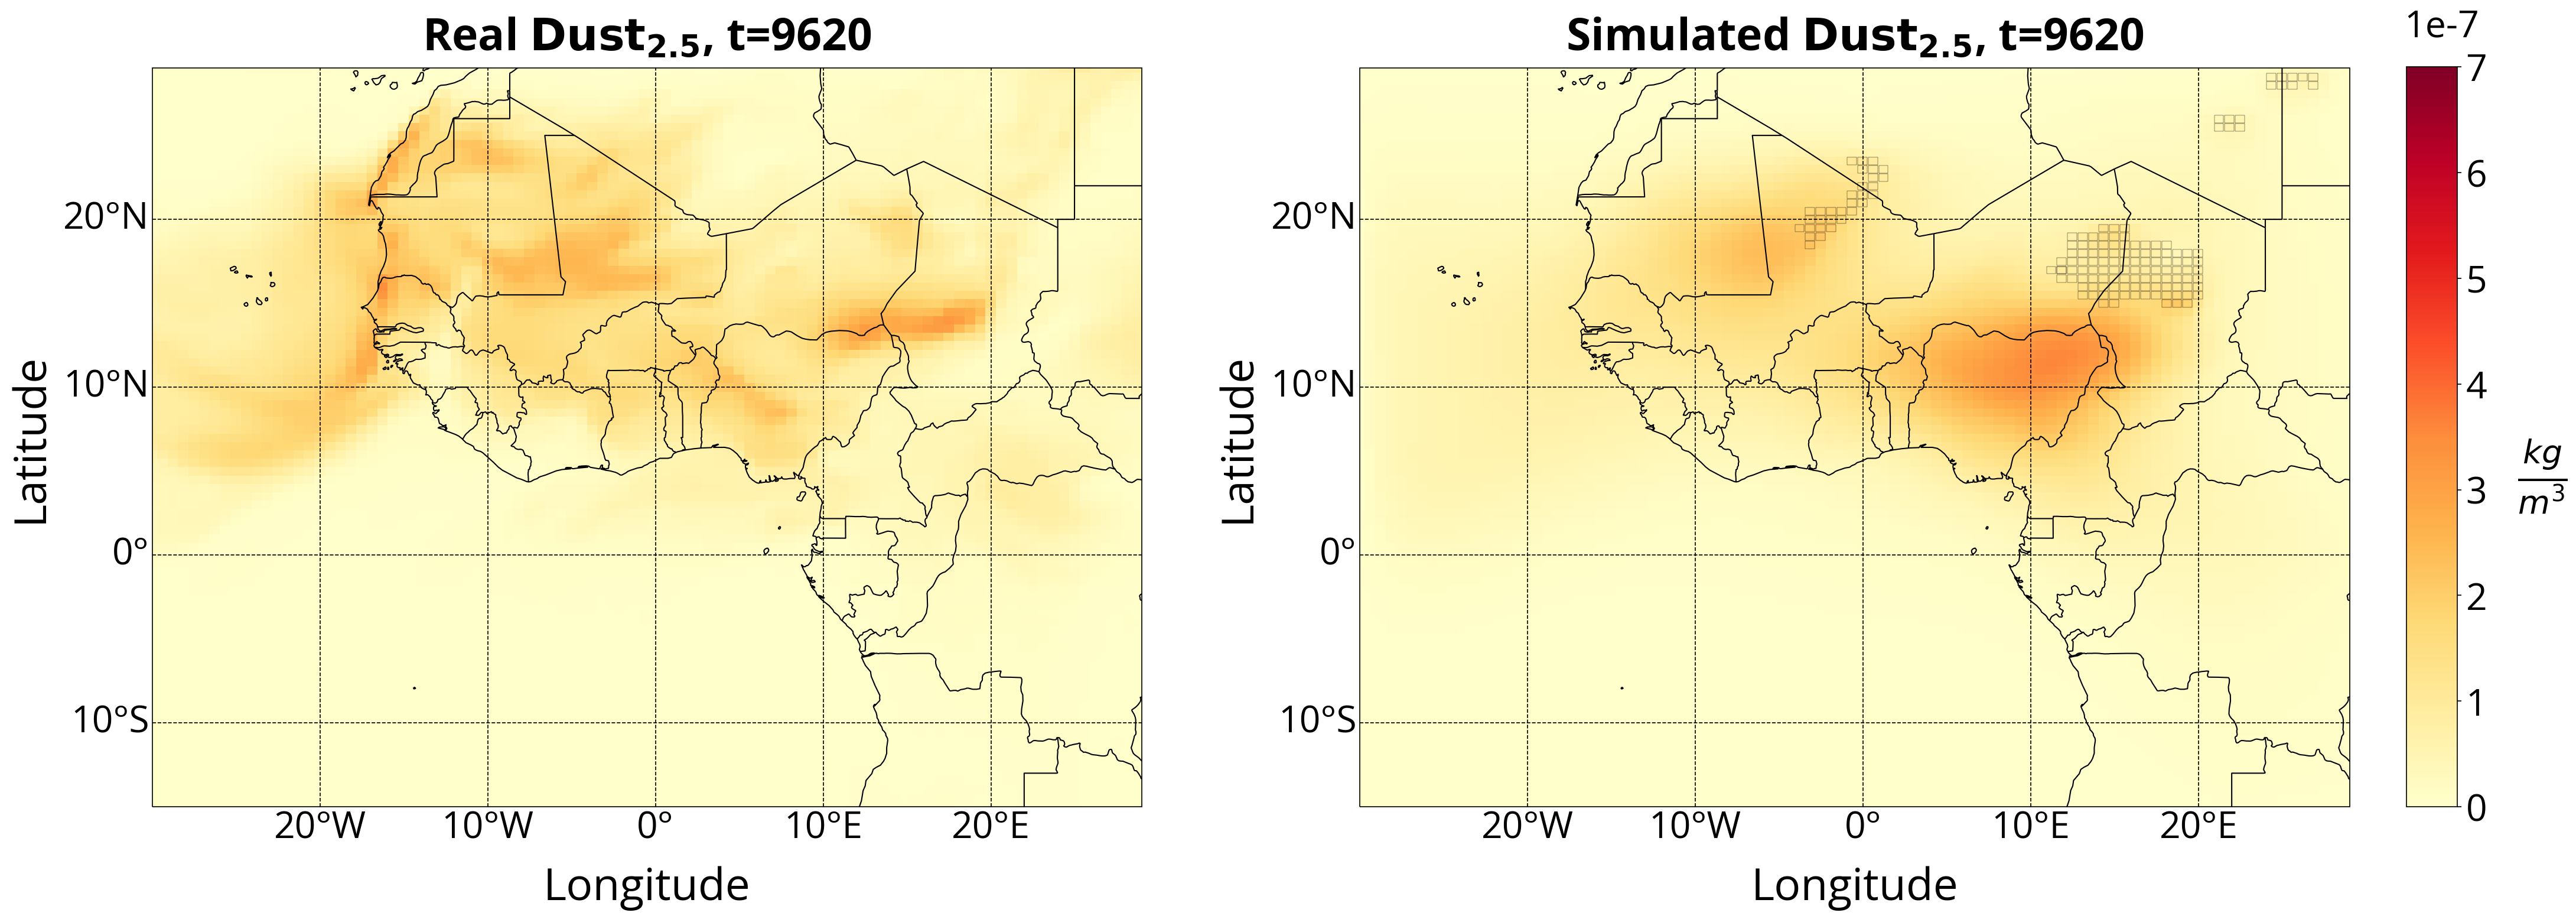

In [ ]:
plot_simulation_comparison([dust_hourly_data[9620]*10**7,simulated_dustmass_hourly_data[9620]* 10**7],
                west_africa_longitudes, west_africa_latitudes,
                titles=['Real $\mathbf{Dust_{2.5}}$, ', 'Simulated $\mathbf{Dust_{2.5}}$, '],
                date=['t=9620', 't=9620'], data_values=[r'$\frac{kg}{m^3}$',r'$\frac{kg}{m^3}$'] ,
                extent=[-30,29,-15,29],
                borders = True, bodele = False, plot_grids = True, add_source_region = True,
                add_bodele_source_exclusive = False, source_region_alpha = 1, source_region_color='black', source_region_lw=.2,
                cbar_color = ['YlOrRd','YlOrRd'], cbar_min = [0,0], cbar_max = [7,7],
                unit = [1,1], figsize = (32,16), rows = 1, columns = 2, shrink=0.56, labelsize = 14,
                text_size = 36, value_size=30, scientific_y =[2.45,7.2], lat_space = [-.1,-.1], lon_space=[-.14,-.14])

In [ ]:
population_array = np.load(parent_directory + '\\processed_data\\population_array.npy')

temp_pop_array = population_array.copy()
# population_weigth_array = create_population_weight_array_old(temp_pop_array)
population_weigth_array = create_population_weight_array(temp_pop_array, ['benin', 'burkina_faso', 'gambia', 'ghana',
                                                                            'guinea', 'liberia','mali', 'niger', 'nigeria',
                                                                            'senegal', 'sierra_leone', 'togo'])

#create population weight array that only takes the pixels where there actually exists populaton data, the others are set to 'NaN'
country_population_weigth_array = population_weigth_array
country_population_weigth_array[country_population_weigth_array == 0] = float("NaN")

In [ ]:
predicted_daily_dust_data_country_weighted = simulated_dustmass_hourly_data * country_population_weigth_array

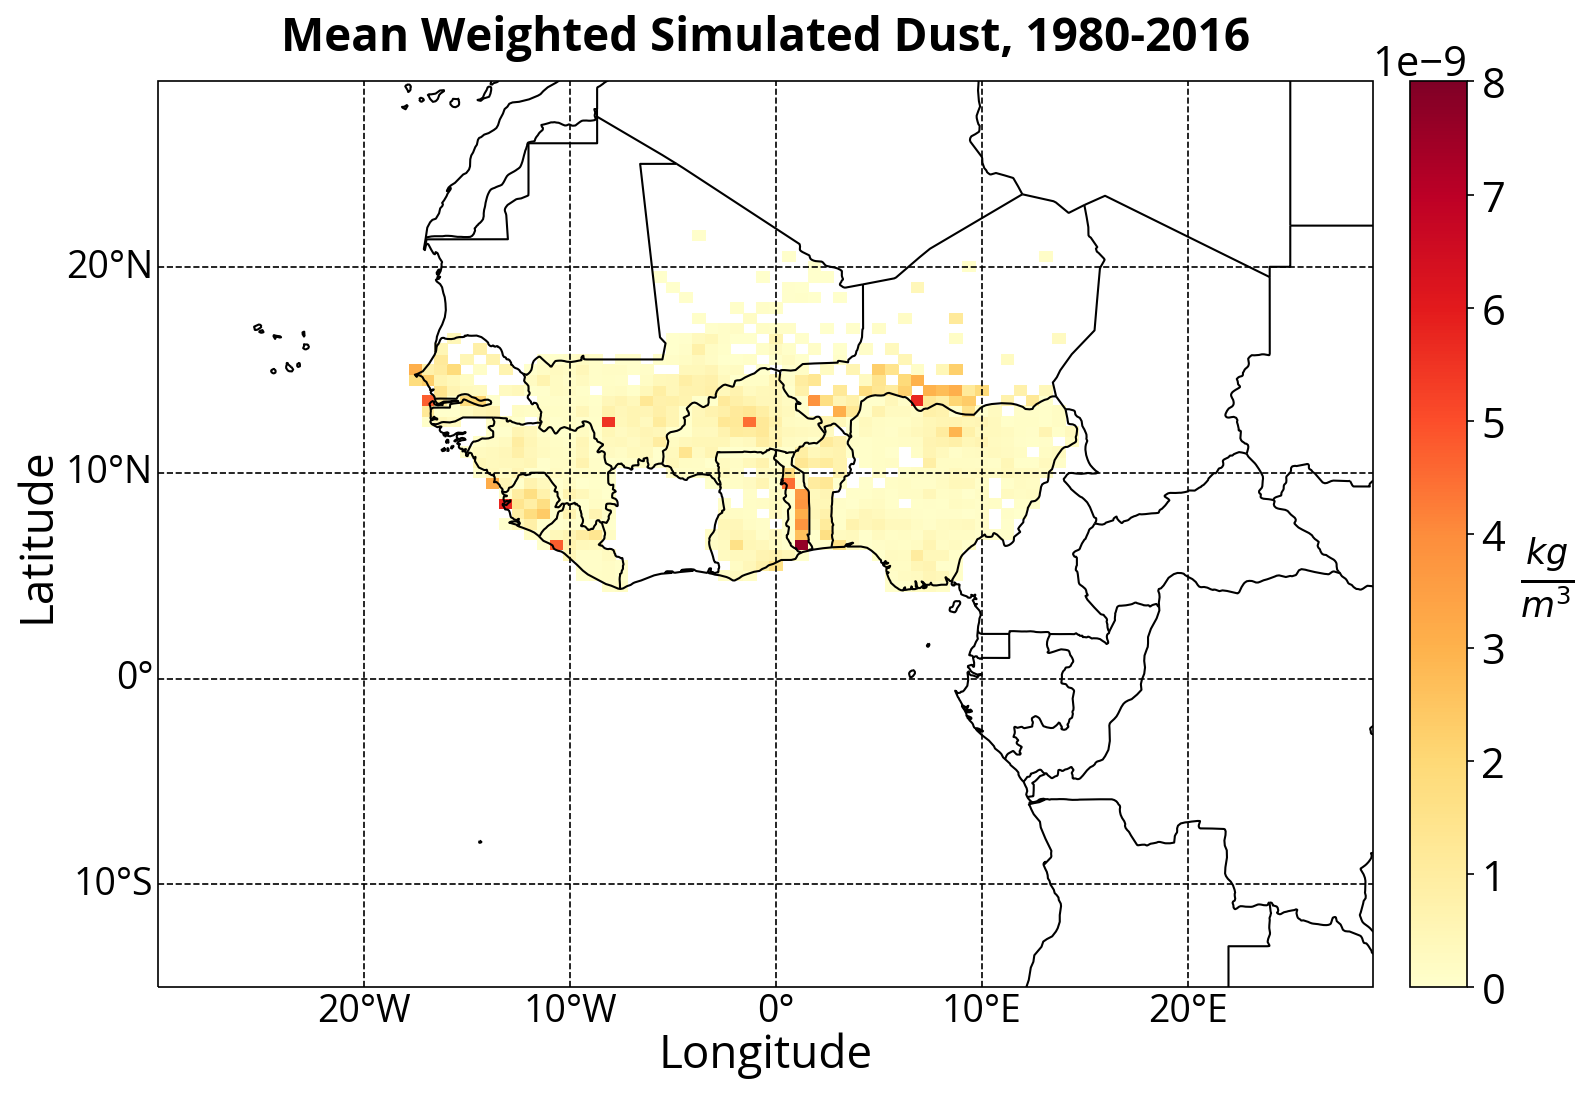

In [ ]:
plot_merra_data(np.sum(predicted_daily_dust_data_country_weighted, axis = 0)/predicted_daily_dust_data_country_weighted.shape[0],
                west_africa_longitudes, west_africa_latitudes, title='Mean Weighted Simulated Dust, ',
                date='1980-2016', data_value=r'$\frac{kg}{m^3}$', extent=[-30,29,-15,29], borders = True,
                bodele = False, plot_grids = True, cbar_max = 8, unit = 10 ** -9,shrink=1, text_size=22, tick_size=20, labelsize=18, ax_text_left = -0.08, rot=0, data_value_label = 20)